# Task 1: Machine Learning Pipeline - Exploration

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from pycaret.classification import *
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from statistics import mean
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler

### Import the data

In [2]:
df = pd.read_csv('promotion_dataset.csv')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


### Observe statistical properties of numerical features and check missing values

In [4]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


It seems like there are missing values in `previous_year_rating` feature. We will impute the missing values with median value of this feature, since this is ordinal feature and replacing with mean wouldn't make much sense.

In [5]:
df['previous_year_rating'].fillna(df['previous_year_rating'].median(), inplace=True)
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.304481,5.865512,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.214770,4.265094,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,99.000000,1.000000


Now there are no missing values in our numerical and ordinal features.

Next, we will examine the unique values of categorical features. In `education` feature, there is a `nan` category, which we need to transform to an arbitrary category. We will replace this category with `others` category 

In [6]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [7]:
df['education'].fillna('others', inplace=True)
df['education'].unique()

array(["Master's & above", "Bachelor's", 'others', 'Below Secondary'],
      dtype=object)

### Which Machine Learning algorithms will be suitable for this dataset?

Now that we have dealt with missing value, we have complete dataset, which consist of our numerical features, categorical features, and our label. Now the question is, which Machine Learning algorithms would be the best for our dataset? To answer this question, we can use PyCaret library, which will compare the performance of all Machine Learning classifiers given our dataset.

In [11]:
exp_clf01 = setup(data = df, target = 'is_promoted', session_id = 123)

,Description,Value
0,session_id,123
1,Target,is_promoted
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(54808, 13)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


PyCaret will take care of transforming our categorical features into one hot encoding.

In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9420,0.8236,0.6742,0.9415,0.9296,0.4854,0.5521,24.8370
lightgbm,Light Gradient Boosting Machine,0.9411,0.8183,0.6678,0.9410,0.9281,0.4725,0.5434,0.3860
xgboost,Extreme Gradient Boosting,0.9410,0.8109,0.6725,0.9395,0.9287,0.4790,0.5429,3.9450
gbc,Gradient Boosting Classifier,0.9394,0.8154,0.6550,0.9402,0.9250,0.4457,0.5256,4.6440
lda,Linear Discriminant Analysis,0.9380,0.7720,0.6624,0.9341,0.9249,0.4516,0.5123,0.4410
rf,Random Forest Classifier,0.9325,0.7826,0.6212,0.9300,0.9144,0.3605,0.4472,2.5150
ridge,Ridge Classifier,0.9264,0.0000,0.5724,0.9319,0.9003,0.2360,0.3654,0.0590
ada,Ada Boost Classifier,0.9263,0.7907,0.5849,0.9212,0.9031,0.2658,0.3640,1.1800
et,Extra Trees Classifier,0.9257,0.7692,0.6148,0.9130,0.9086,0.3270,0.3820,3.0390
nb,Naive Bayes,0.9154,0.7163,0.5086,0.9226,0.8765,0.0310,0.1214,0.0670


It turns out that for our dataset, the CatBoost Classifier is the best algorithm. Hence, we are going to build a CatBoost classifier in this task. We will compare the catBoost classifier with simple Logistic Regression.

### Separating features data and the label

Now we need to separate our features with our label. Next, we need to further separate our features into numerical features and categorical features. This is important because we need to encode categorical features before ML model training.

In [10]:
x, y = df.iloc[:, 1:-1], df.iloc[:, [-1]]

In [134]:
numerical_feat = x.select_dtypes(include=['int64', 'float64']).columns
categorical_feat = x.select_dtypes(include=['object', 'bool']).columns

### Which metrics should we use?

In [124]:
y['is_promoted'].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

It seems like we have an imbalanced dataset issue. The amount of data regarding non-promoted people are much larger that the one who got promoted. Hence, using accuracy as a metrics might not going to be the best. For this task, we are going to use accuracy and F1 score.

### Creating a pipeline to preprocess features data

Next, we need to preprocess our data. This step includes transforming our categorical features into one-hot encoding and normalizing our numerical features such that they have the same scale to speed up training process.

In [481]:
trans = [('cat', OneHotEncoder(), categorical_feat), ('num', MinMaxScaler(), numerical_feat)]
col_transform = ColumnTransformer(transformers=trans)

In [482]:
model_LR = LogisticRegression()

In [483]:
model_cat = CatBoostClassifier(verbose=0, n_estimators=50)

In [484]:
model_rfc = RandomForestClassifier(n_estimators=10, class_weight={0:1,1:5})

In [485]:
pipeline_LR = Pipeline(steps=[('prep',col_transform), ('m', model_LR)])
pipeline_cat = Pipeline(steps=[('prep',col_transform),('m', model_cat)])
pipeline_rfc = Pipeline(steps=[('prep',col_transform), ('m', model_rfc)])

### Model training with Logistic Regression

First, we build the model using Logistic Regression and let's check for its accuracy and F1 score

In [486]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [487]:
pipeline_LR.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('n...
                                                  Index(['no_of_trainings', 'age', 'previou

In [488]:
y_pred = pipeline_LR.predict(x_test)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('F1_score: ', f1_score(y_pred, y_test))

Accuracy:  0.937746314406656
F1_score:  0.4271323035594359


We can check the accuracy of the model in a more robust way with cross-validation technique.

In [448]:
evaluation_metrics = ['accuracy', 'f1']

In [449]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [450]:
for i,v in enumerate(evaluation_metrics):
    print(str(v)+ ': ' + str(mean(cross_val_score(pipeline_LR, x, y, scoring= v, cv=cv, n_jobs=-1))))

accuracy: 0.9369434822618815
f1: 0.4243489364189065


It looks like that the accuracy of the model is very high, which is 93'7%. However, the F1 score is just 42,4%. Let's see if we can increase the model performance with oversampling techniques.

#### With Oversampling

In [501]:
oversample = RandomOverSampler(sampling_strategy=0.3)
x_resampled, y_resampled = oversample.fit_resample(x_train, y_train)

In [502]:
len(x_resampled)

48869

In [503]:
pipeline_LR.fit(x_resampled, y_resampled)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('n...
                                                  Index(['no_of_trainings', 'age', 'previou

In [504]:
y_pred = pipeline_LR.predict(x_test)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('F1_score: ', f1_score(y_pred, y_test)) 

Accuracy:  0.9286965406509998
F1_score:  0.4866001050972149


As we can see, it turns out that oversampling method improves the F1 score of our model a little bit.

#### with Random Forest

The next method that we will try is using Random Forest classifier as this algorithm allows us to assign weights to each class. The minority class will have a weight of 5 and majority class will have a weight of 1.

In [461]:
pipeline_rfc.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('n...
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                    

In [457]:
y_pred = pipeline_rfc.predict(x_test)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('F1_score: ', f1_score(y_pred, y_test))

Accuracy:  0.933732301853744
F1_score:  0.4245880861850444


As we can see, it turns out that Random Forest method is not going to increase the F1 score of our model as well.

### Model training with CatBoost Classifier

Next, let's train the model with CatBoost classifier with the same approach as before

In [505]:
pipeline_cat.fit(x_resampled, y_resampled)

Pipeline(memory=None,
         steps=[('prep',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('cat',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=True),
                                                  Index(['department', 'region', 'education', 'gender', 'recruitment_channel'], dtype='object')),
                                                 ('num',
                                                  MinMaxScaler(copy=True,
                

In [506]:
y_pred = pipeline_cat.predict(x_test)
print('Accuracy: ', accuracy_score(y_pred, y_test))
print('F1_score: ', f1_score(y_pred, y_test))

Accuracy:  0.9313968763684134
F1_score:  0.5052631578947367


In [507]:
for i,v in enumerate(evaluation_metrics):
    print(str(v)+ ': ' + str(mean(cross_val_score(pipeline_cat, x, y, scoring= v, cv=cv, n_jobs=-1))))

accuracy: 0.9425630878802286
f1: 0.5109881501760616


As expected, CatBoost classifier performs better than Logistic Regression for our dataset.

### Which features are important for model prediction?

Next, we need to observe whether we should use all of our features, or should we remove some of the features to improve the performance of our ML model.

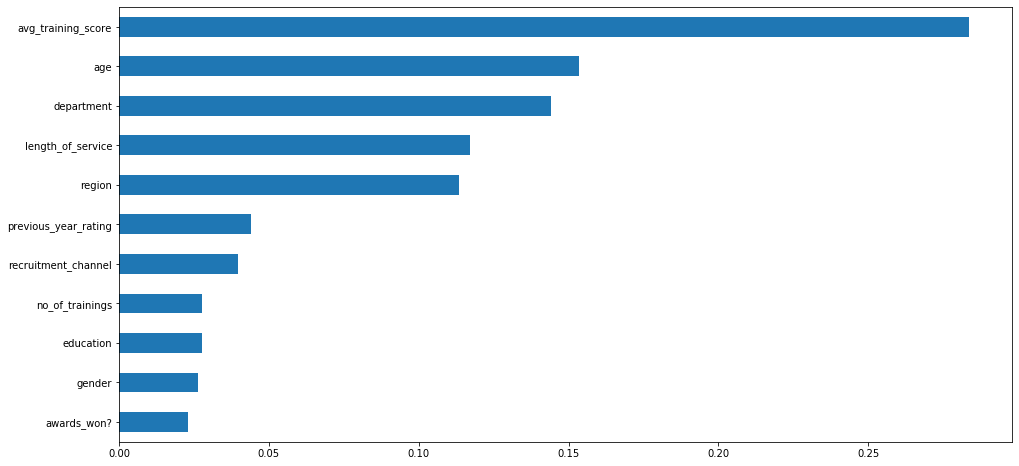

In [414]:
dt=DecisionTreeRegressor()
fs_trans = [('cat', OrdinalEncoder(), categorical_feat), ('num', MinMaxScaler(), numerical_feat)]
col_transform_fs = ColumnTransformer(transformers=fs_trans)
pipeline_dt = Pipeline(steps=[('prep',col_transform_fs), ('m', dt)])
pipeline_dt.fit(x,y)
feat_importances1 = pd.Series(pipeline_dt.steps[1][1].feature_importances_, index=x.columns)
fig = plt.figure(figsize=(16, 8))
feat_importances1.sort_values(ascending=True).plot(kind='barh')
plt.show()

From the visualization above, it seems that all of the features have their own importance to influence the model prediction behavior. Hence, it would make sense to use all of the features.